In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import KNNImputer
pd.set_option('display.max_columns', None)
working_dir = ''
output_dir = ''

In [17]:
df = pd.read_csv(working_dir + 'train.csv')

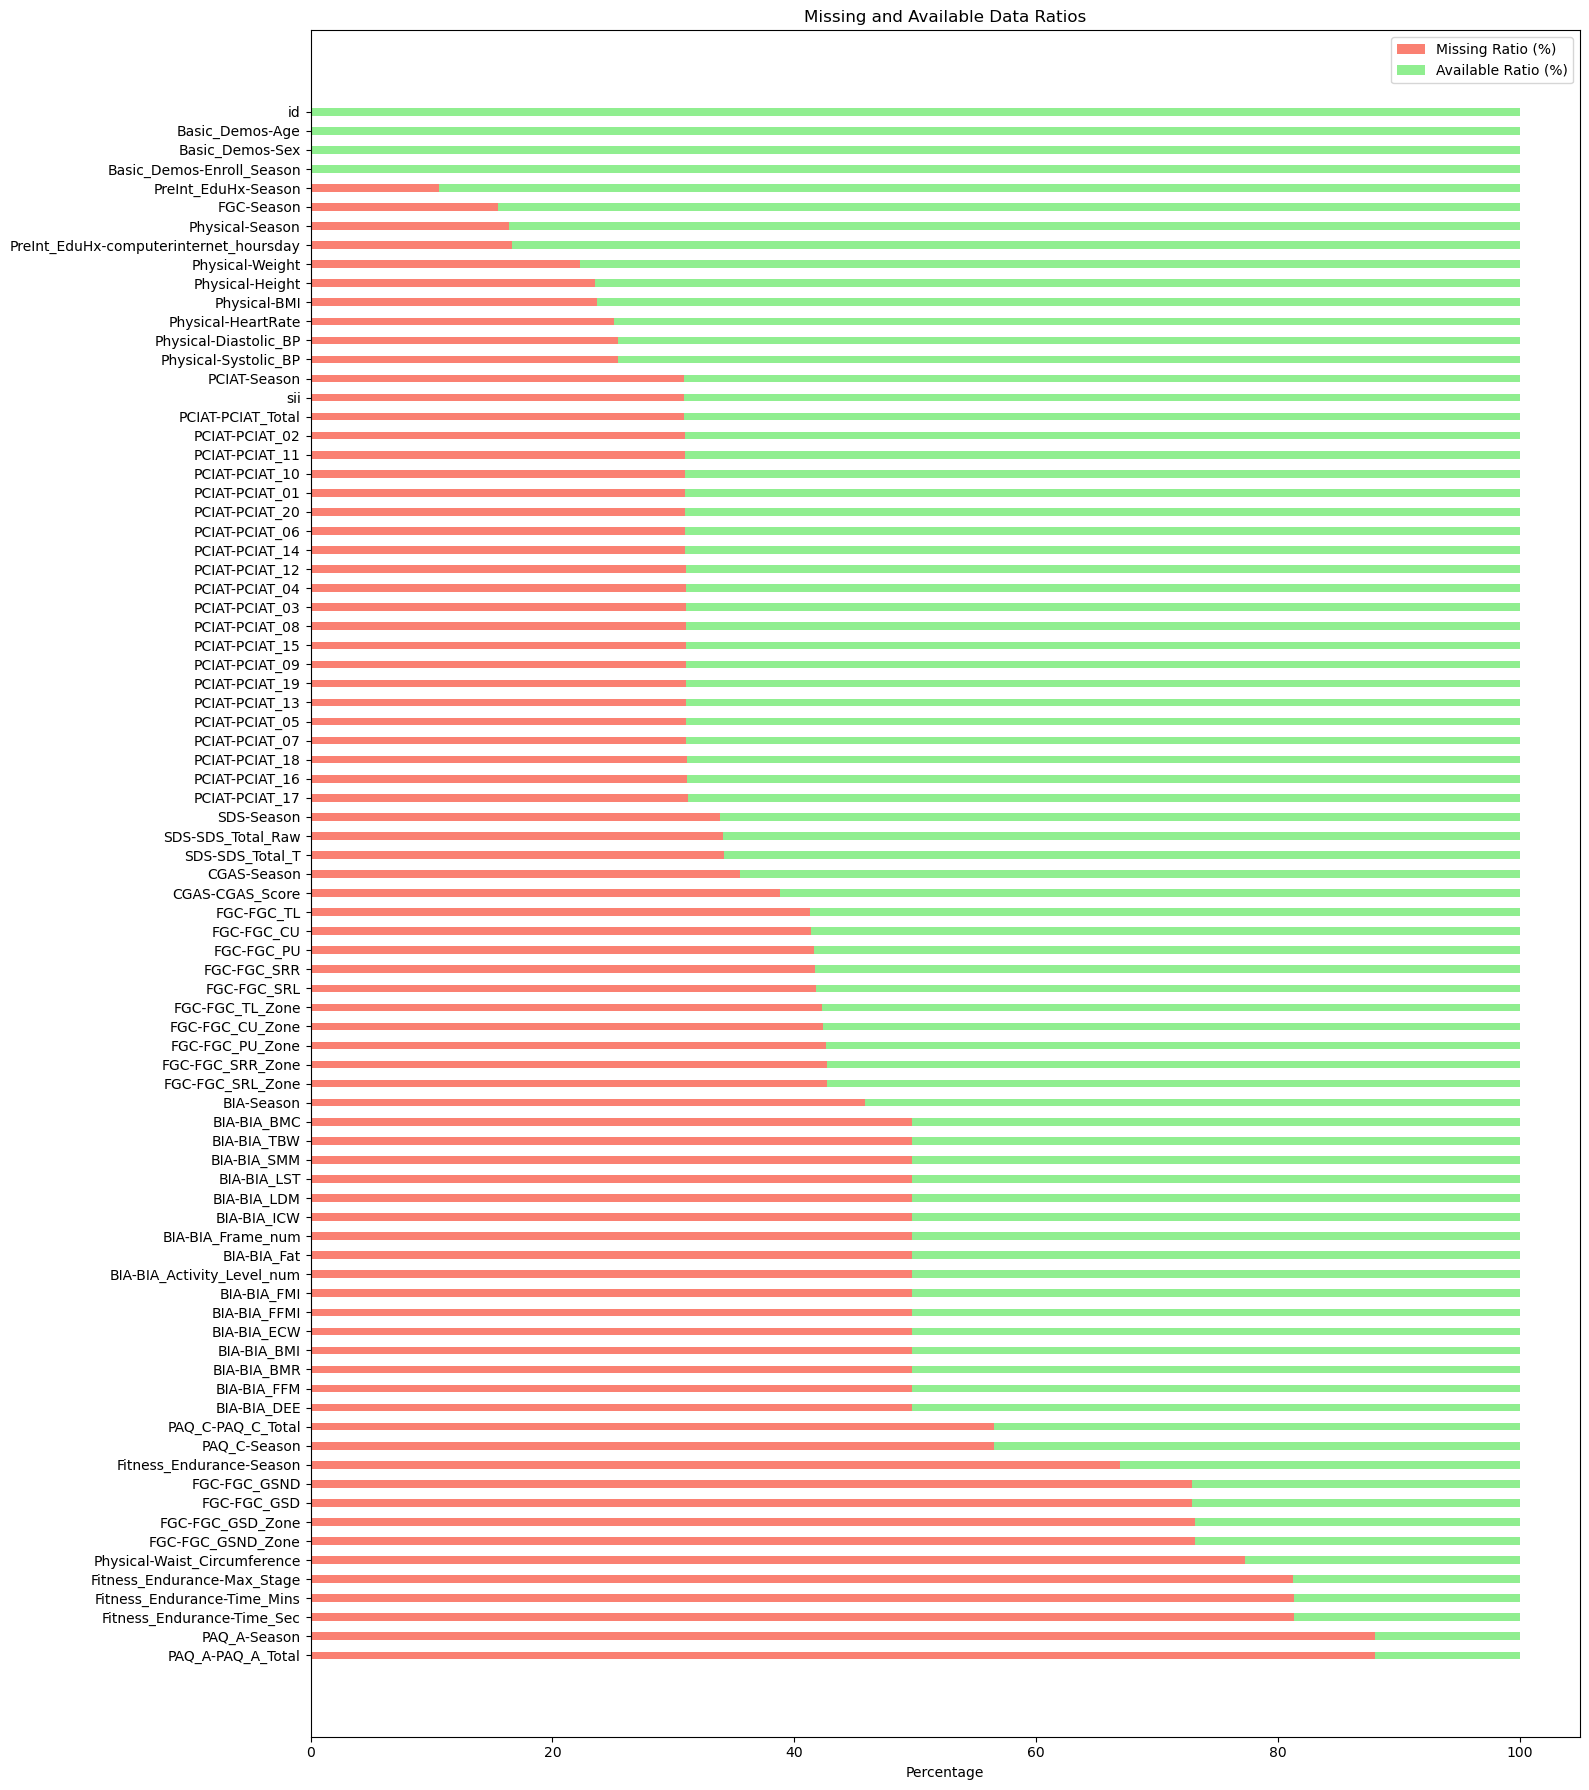

3960

In [18]:
def plot_nas(df: pd.DataFrame):
    # Calculate the missing and available data ratios
    na_df = (df.isnull().sum() / len(df)) * 100  # Missing ratio in percentage
    na_df = na_df.sort_values(ascending=False)  # Sort values
    
    available_df = 100 - na_df  # Available ratio in percentage
    
    # Create a horizontal stacked bar chart
    plot_width, plot_height = (16, 18)
    plt.rcParams['figure.figsize'] = (plot_width, plot_height)
    
    fig, ax = plt.subplots()
    bar_height = 0.4  # Set bar height to make them thinner
    y_pos = np.arange(len(na_df))  # Positions for bars
    
    ax.barh(y_pos, na_df, color='salmon', label='Missing Ratio (%)', height=bar_height)
    ax.barh(y_pos, available_df, left=na_df, color='lightgreen', label='Available Ratio (%)', height=bar_height)
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(na_df.index)
    ax.set_xlabel('Percentage')
    ax.set_title('Missing and Available Data Ratios')
    ax.legend()
    plt.tight_layout()
    plt.show()

plt.rcParams['figure.figsize'] = (3,3)
plot_nas(df)

len(df)

In [19]:
# Dealing with season data
# Method 1: Dropping
# df = df.loc[: ,~df.columns.str.contains('season', case=False)]

# Method 2: Encoding
display(df.head().select_dtypes(exclude='number'))

season_cols = df.select_dtypes(exclude='number').columns
season_cols = [col for col in season_cols if 'id' not in col]

# Encode
season_mapping = {
    'Spring' : 1,
    'Sumemr' : 2,
    'Fall'   : 3,
    'Winter' : 4
}

for col in season_cols:
    df[col] = df[col].apply(lambda x : np.uint8(season_mapping.get(x, 0))).astype(int)

season_cols

,id,Basic_Demos-Enroll_Season,CGAS-Season,Physical-Season,Fitness_Endurance-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,PreInt_EduHx-Season
0,00008ff9,Fall,Winter,Fall,NaN,Fall,Fall,NaN,NaN,Fall,NaN,Fall
1,000fd460,Summer,NaN,Fall,NaN,Fall,Winter,NaN,Fall,Fall,Fall,Summer
2,00105258,Summer,Fall,Fall,Fall,Fall,NaN,NaN,Summer,Fall,Fall,Summer
3,00115b9f,Winter,Fall,Summer,Summer,Summer,Summer,NaN,Winter,Summer,Summer,Winter
4,0016bb22,Spring,Summer,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,NaN


['Basic_Demos-Enroll_Season',
 'CGAS-Season',
 'Physical-Season',
 'Fitness_Endurance-Season',
 'FGC-Season',
 'BIA-Season',
 'PAQ_A-Season',
 'PAQ_C-Season',
 'PCIAT-Season',
 'SDS-Season',
 'PreInt_EduHx-Season']

In [11]:
# Trim rows by sii and pciat
df = df.drop(columns=['id'])
pciat_columns = [col for col in df.columns if col.split(sep='-')[0] == 'PCIAT']
pciat_columns.append('sii')
df = df.dropna(subset=pciat_columns)
df = df.dropna(subset='sii')
df.head(5)

len(df)

2671

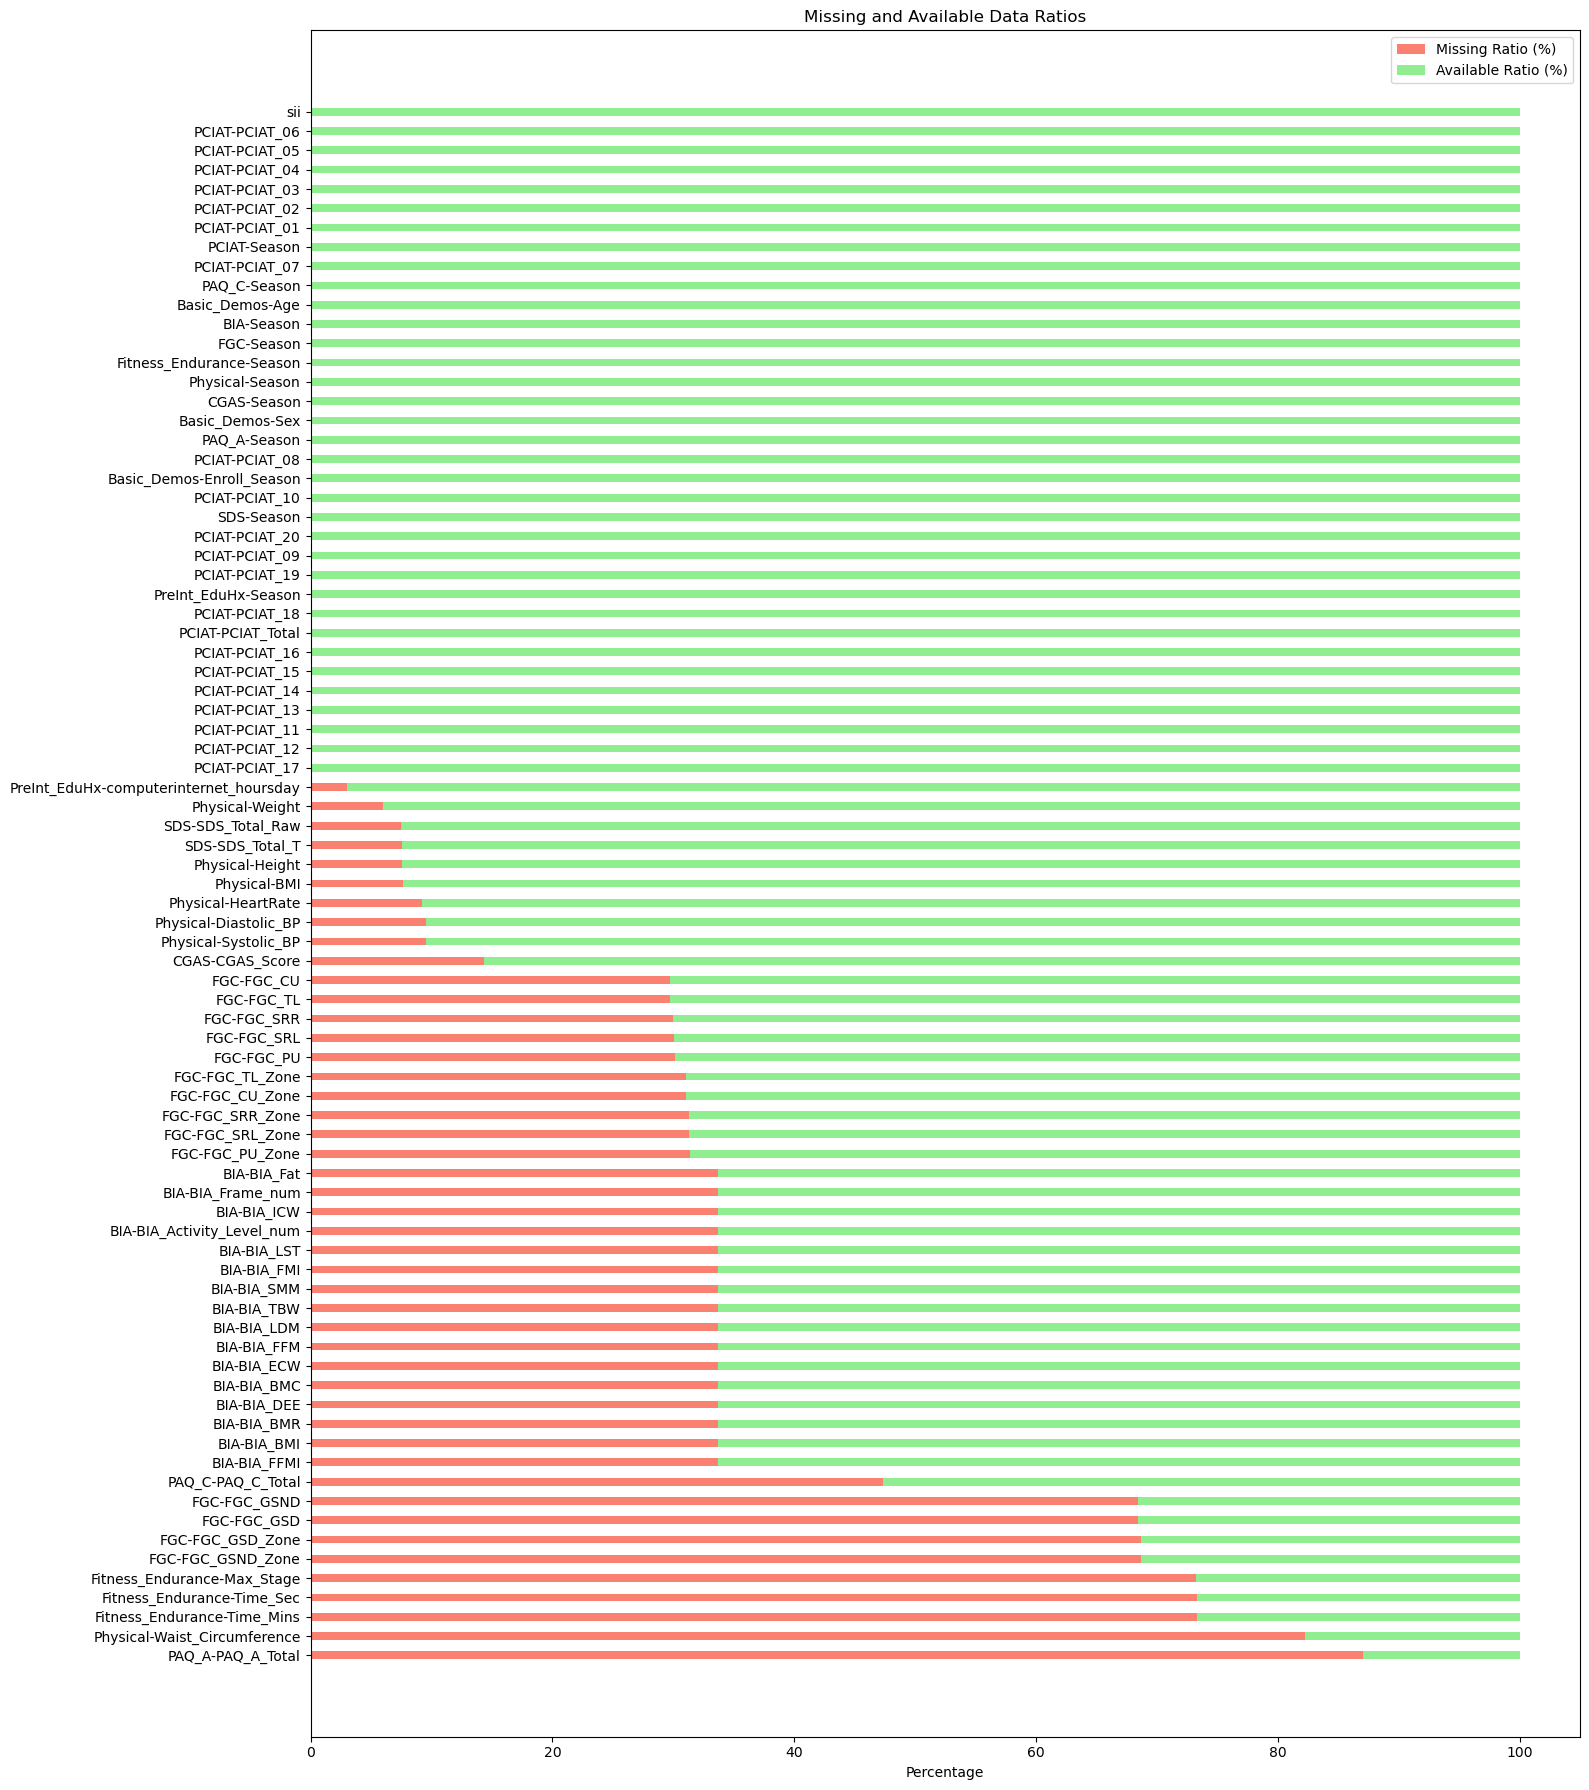

In [12]:
plt.rcParams['figure.figsize'] = (3,3)
plot_nas(df)

In [14]:
# Dropping all data with > 40% missing ratio
dropped_cols = []
columns = df.columns
for col in columns:
    missing_ratio = df[col].isna().sum() / len(df)
    if missing_ratio > 0.56:
        df = df.drop(columns=col)
        dropped_cols.append(col)

print('Dropped: ')
print(dropped_cols)

len(df)

Dropped: 
[]


2671

In [8]:
df.describe()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
count,2671.000000,2671.000000,2671.000000,2671.000000,2288.000000,2671.000000,2466.000000,2469.000000,2510.000000,2417.000000,2425.000000,2417.000000,2671.000000,2671.000000,1876.000000,1841.000000,1867.000000,1833.000000,1868.000000,1834.000000,1870.000000,1836.000000,1876.000000,1842.000000,2671.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,2671.000000,2671.000000,1407.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2471.000000,2470.000000,2671.000000,2590.000000,2671.000000
mean,2.000374,10.205541,0.365032,1.668289,65.132430,1.898165,19.116424,55.853880,87.658697,69.745552,81.938557,117.079437,0.969300,1.831149,11.881130,0.525801,5.740761,0.344244,8.775268,0.638495,8.875374,0.634532,9.121242,0.775244,1.217522,2.672501,6.993058,19.215122,1234.344029,2065.425189,20.706039,73.736873,14.951532,4.263591,15.794107,1.733484,33.032116,19.998725,66.743816,34.186554,53.738155,0.256084,1.049045,2.587353,1.961812,2.358293,2.168476,2.386747,0.822538,2.285661,1.050168,0.578809,1.232872,1.052789,1.296518,1.673156,0.240734,1.330213,1.021715,1.478847,1.434669,1.617746,1.600150,1.147510,0.929240,27.706851,1.840884,40.927964,57.582186,1.975665,1.005792,0.572070
std,1.563751,3.413685,0.481529,1.589774,11.821454,1.581530,4.915538,7.392539,43.317047,13.787119,13.822869,17.206969,1.475833,1.558936,11.998855,0.499470,7.433180,0.475251,3.292636,0.480567,3.318378,0.481692,2.956121,0.417535,1.542727,1.029522,98.165421,4.921272,1981.453289,2995.698856,77.537671,211.051166,5.912054,6.472673,211.125767,0.671538,59.447552,74.363473,114.552084,88.748672,136.816939,0.880253,1.520715,0.784687,1.559327,1.671541,1.694250,1.588287,1.183830,1.704921,1.259165,1.040232,1.335086,1.252048,1.328055,1.538235,0.518644,1.407943,1.293420,1.482552,1.484294,1.443664,1.522978,1.335749,1.172664,20.282070,1.596975,10.216942,13.015597,1.562843,1.078050,0.766791
min,0.000000,5.000000,0.000000,0.000000,25.000000,0.000000,0.000000,36.000000,0.000000,11.000000,27.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.789610,0.048267,813.397000,1073.450000,1.789450,28.900400,7.864850,-194.163000,-8745.080000,1.000000,17.845000,4.635810,23.620100,11.382500,20.589200,0.000000,0.000000,0.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000,0.00000

In [9]:
num_columns = [col for col in df.columns if 
              (col.split(sep='-')[0] != 'PCIAT' and col.split(sep='-')[0] != 'sii'
                  and col != 'id'
              )
          ]

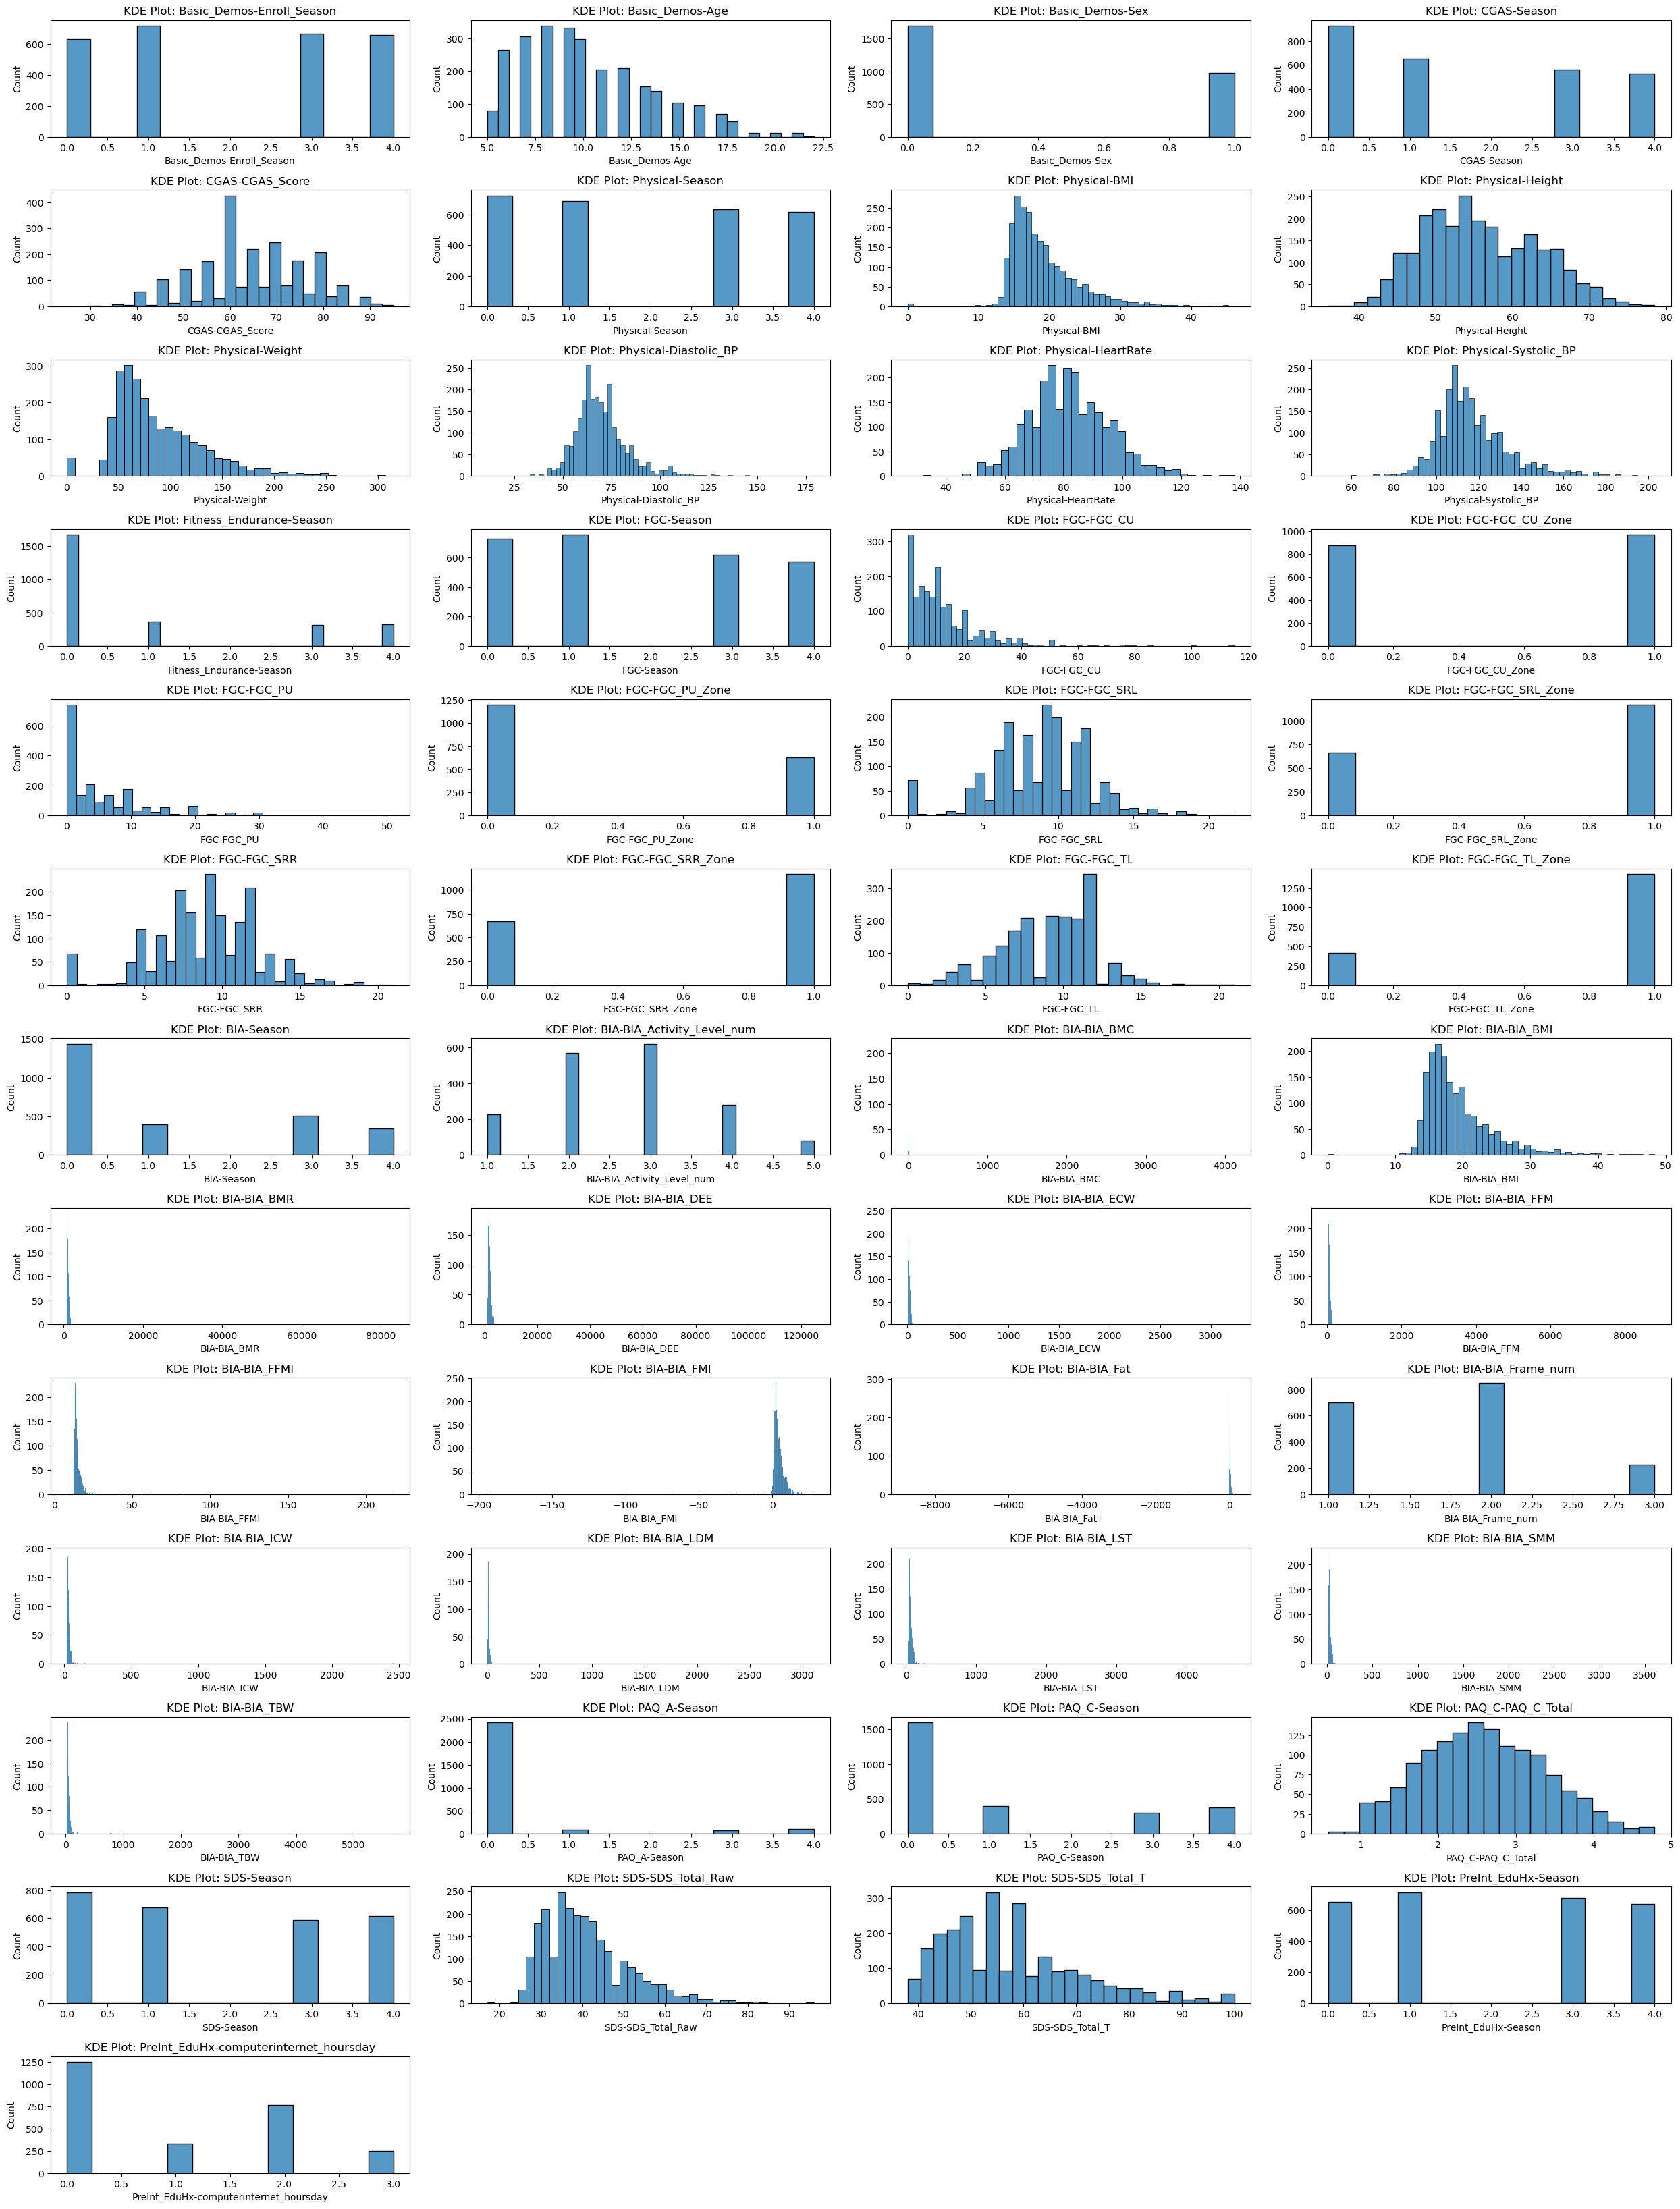

In [10]:
def plotFeaturesKDE(df):
    fig, axes = plt.subplots(20,4,figsize=(25,50))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], label=col, ax=axes[i])
        axes[i].set_title(f"KDE Plot: {col}")
    
    for j in range(len(num_columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plotFeaturesKDE(df[num_columns])

In [11]:
# General quantile capping
feature_cap = {}
for col in num_columns:
    if col == 'id':
        continue
    feature_cap[col] = {
        'lower': df[col].quantile(0.01),
        'upper': df[col].quantile(0.99)
    }
    df[col] = df[col].clip(df[col].quantile(0.01), df[col].quantile(0.99))

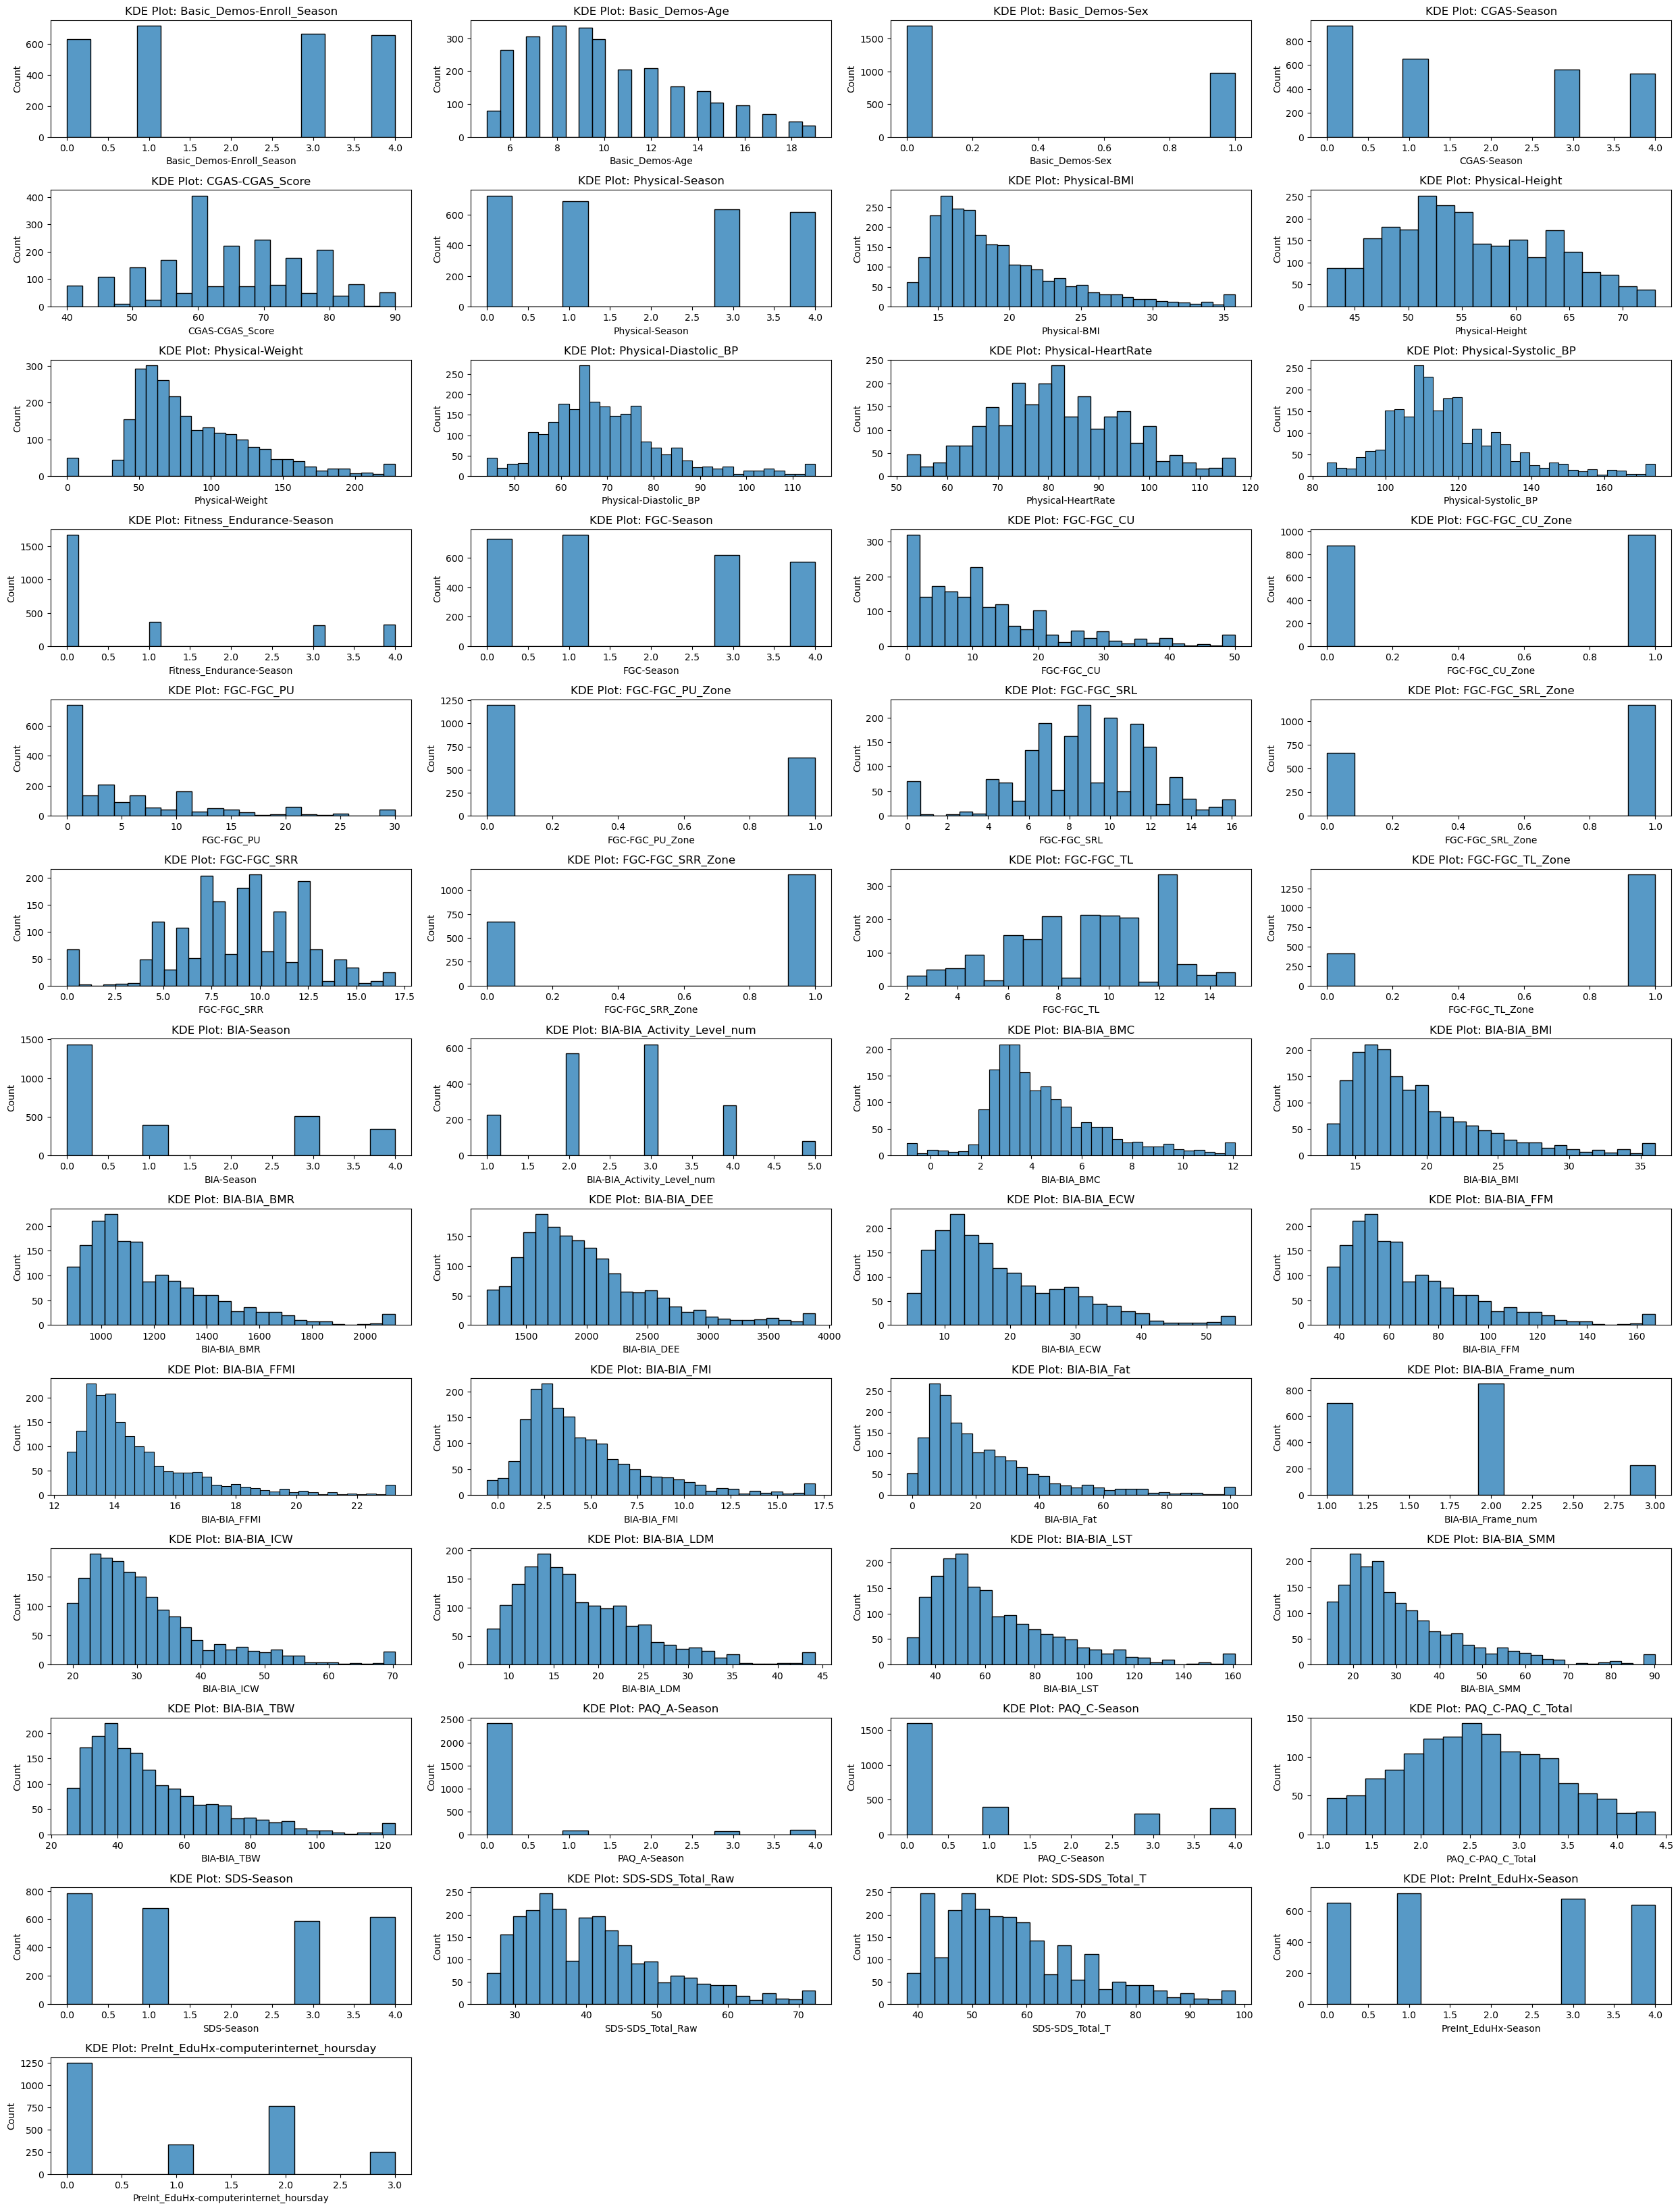

In [12]:
plotFeaturesKDE(df[num_columns])

<Axes: >

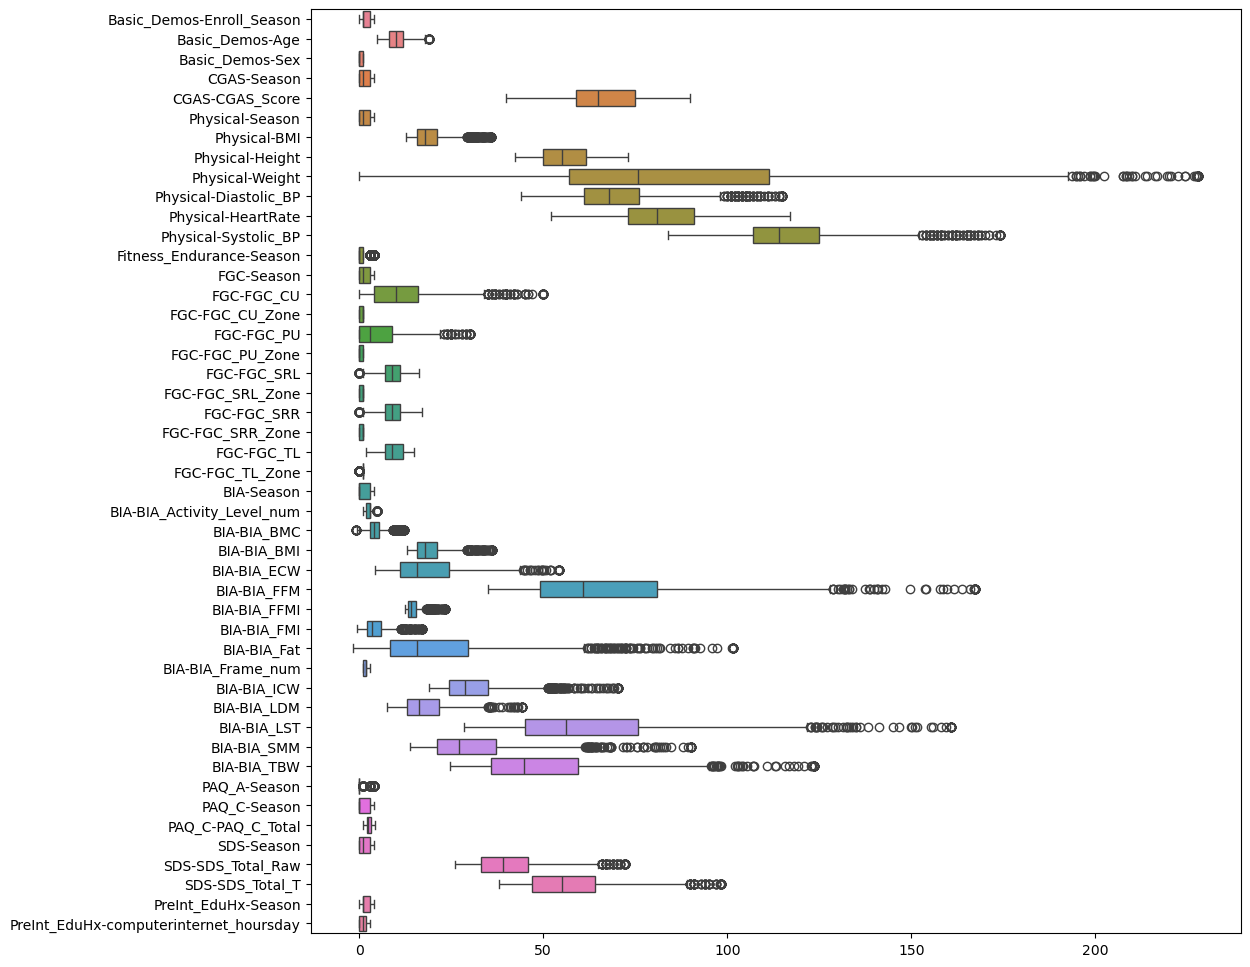

In [13]:
tmp_col = [col for col in num_columns if (col != 'BIA-BIA_BMR' and col != 'BIA-BIA_DEE')]
plt.figure(figsize=(12,12))
sns.boxplot(df[tmp_col], orient='h')

<Axes: >

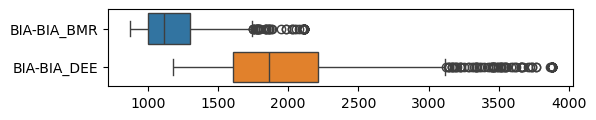

In [14]:
tmp_col = [col for col in num_columns if (col == 'BIA-BIA_BMR' or col == 'BIA-BIA_DEE')]
plt.figure(figsize=(6,1))
sns.boxplot(df[tmp_col], orient='h')

In [15]:
df.describe().loc[['min', 'max']]

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
min,0.0,5.0,0.0,0.0,40.0,0.0,12.831486,42.42,0.000,44.00,52.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,2.0,0.0,0.0,1.0,-0.931609,13.00020,870.8199,1177.013,4.282165,35.01676,12.42574,-0.566587,-1.688491,1.0,19.04658,7.547219,28.46145,13.84646,24.67301,0.0,0.0,1.0400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,38.00,0.0,0.0,0.0
max,4.0,19.0,1.0,4.0,90.0,4.0,35.763663,73.00,227.946,114.84,117.0,174.0,4.0,4.0,50.0,1.0,30.0,1.0,16.165,1.0,17.0,1.0,15.0,1.0,4.0,5.0,12.077160,36.02461,2113.8900,3882.020,54.360870,167.42020,23.25433,17.026410,101.518800,3.0,70.37418,44.183390,160.78520,90.21757,123.64100,4.0,4.0,4.3894,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,93.0,4.0,72.3,98.31,4.0,3.0,3.0


In [16]:
# Considering all Physical and BIA data that are <= less than or equal to 0 are errors
# we will replace it with NaN then impute (Age too)
physical_columns = [col for col in df.columns if col.split(sep='-')[0] == 'Physical']
BIA_columns = [col for col in df.columns if col.split(sep='-')[0] == 'BIA']
df[df['Basic_Demos-Age'] == 0] = np.nan
df[df[physical_columns + BIA_columns] <= 0] = np.nan

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2671 entries, 0 to 3958
Data columns (total 72 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               2671 non-null   int64  
 1   Basic_Demos-Age                         2671 non-null   int64  
 2   Basic_Demos-Sex                         2671 non-null   int64  
 3   CGAS-Season                             2671 non-null   int64  
 4   CGAS-CGAS_Score                         2288 non-null   float64
 5   Physical-Season                         1944 non-null   float64
 6   Physical-BMI                            2466 non-null   float64
 7   Physical-Height                         2469 non-null   float64
 8   Physical-Weight                         2459 non-null   float64
 9   Physical-Diastolic_BP                   2417 non-null   float64
 10  Physical-HeartRate                      2425 non-null   float64
 

In [18]:
# Method 1 Using KNN imputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Divide into 5 cluster corresponding to 5 groups of PCIAT

# 5 is an intuitive guess, need to find optimal number of k-neighbours later.
imputer = KNNImputer(
    n_neighbors=5
)

feature_columns = [col for col in df.columns if 
                      col not in pciat_columns and
                      col != 'sii' and
                      col != 'id'
                 ]

X = np.array(df[feature_columns])
X_imputed = imputer.fit_transform(X)
df[feature_columns] = X_imputed

In [19]:
df['sii'].value_counts()

sii
0.0    1568
1.0     711
2.0     359
3.0      33
Name: count, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [22]:
# Model 1: Random forest
X = df[feature_columns]
Y = df['sii']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.8, test_size=0.2, stratify=Y, random_state=42)
kappa_scorer = make_scorer(cohen_kappa_score, weights='quadratic')

In [23]:
# Using grid search
rf_param = {
    'n_estimators': [100],  
    'max_depth': [6, 8], 
    'random_state': [42], 
    'bootstrap': [True],  
    'criterion': ['entropy'], 
    'max_features': [None], 
    'class_weight': ['balanced'],
    'min_samples_split' : [2, 5, 10]
}

forest = GridSearchCV(RandomForestClassifier(), rf_param, scoring=kappa_scorer, cv=5, verbose=3)
forest.fit(X_train, Y_train)
forest.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, min_samples_split=2, n_estimators=100, random_state=42;, score=0.385 total time=   2.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, min_samples_split=2, n_estimators=100, random_state=42;, score=0.406 total time=   2.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, min_samples_split=2, n_estimators=100, random_state=42;, score=0.303 total time=   2.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, min_samples_split=2, n_estimators=100, random_state=42;, score=0.390 total time=   2.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, min_samples_split=2, n_estimators=100, random_state=42;, score=0.485 tota

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_split': 5,
 'n_estimators': 100,
 'random_state': 42}

In [24]:
# # Model 2: Gradient Booosting (Not very effectie but can be used for ensemble) Over fit
# xgb_param = {
#     'n_estimators' : [100],
#     'max_depth'    : [3],
#     'random_state' : [42],
#     'criterion'    : ['friedman_mse'],
#     'max_features' : [None],
#     # 'warm_start'   : [True],
#     'subsample'    : [0.8],
#     'loss'         : ['log_loss'],
#     'learning_rate': [0.1],
# }

# # I found the parameters through trial and error, e.g learning rate param_grid was firs 1, 0.09, 0.08, 0.05
# # Since best model has 0.05 for learning-rate, I delete others and try smaller lr lik 0.01 and 0.05
# # Best is still 0.05 then I try something else
# # Since changing the current parameters doesn't make any difference anymore, I try new parameters
# # The problem now is overfitting where training accuracy is around 89% but testing its around 32%
# # I will need to change parameters that mitigate overfitting

# # Confusion matrix shows that classes with smaller labels get misclassified with classes with more number of sample
# # So I added balance class weight to try to solve the problem

# # GBM perform worse with highly correlated features, maybe I will try dimension reduction

# xgb_forest = GridSearchCV(
#     estimator=GradientBoostingClassifier(),
#     param_grid=xgb_param, 
#     scoring=kappa_scorer,
#     cv=5,
#     verbose=3
# )

# xgb_forest.fit(X_train, Y_train)

Train: 0.6258848786144378
Test: 0.4109754478752118


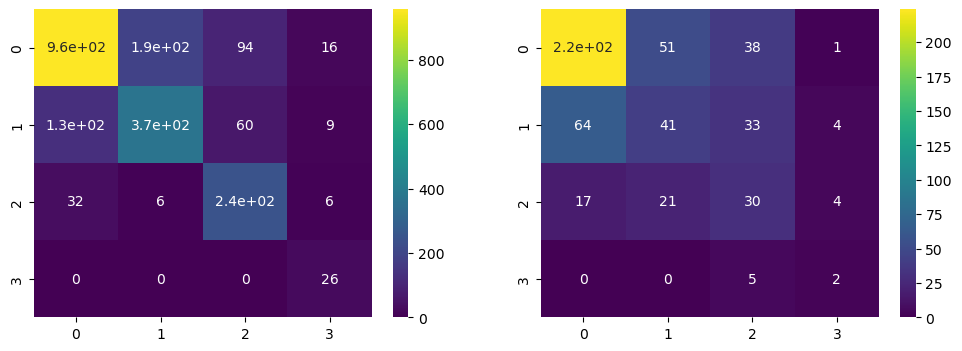

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

model_for_validation = forest
sns.heatmap(confusion_matrix(Y_train, model_for_validation.predict(X_train)), annot=True, cmap='viridis', ax=ax[0])
print(f"Train: {cohen_kappa_score(Y_train, model_for_validation.predict(X_train), weights='quadratic')}")

# Problem class 3 always get wrong prediction
# Class 2 get misclassified alot with class 

# Class accuracy improved with balanced weight but same problem still persist
Y_pred = model_for_validation.predict(X_val)
sns.heatmap(confusion_matrix(Y_val, Y_pred), annot=True, cmap='viridis', ax=ax[1])
print(f"Test: {cohen_kappa_score(Y_val, Y_pred, weights='quadratic')}")

<h1>Submission</h1>

In [26]:
# Model 1 pipeline
# Load data
test_df = pd.read_csv(working_dir + 'test.csv')
                 
def transform(test_df):
    # Drop text features
    test_df = test_df.drop(dropped_cols, axis=1)
    # test_df = test_df.loc[: ,~test_df.columns.str.contains('season', case=False)]


    for col in season_cols:
        if col in dropped_cols or col == 'PCIAT-Season':
            continue
        test_df[col] = test_df[col].apply(lambda x : np.uint8(season_mapping.get(x, 0)).astype(int))

    # Get numeric columns
    num_columns = [col for col in test_df.columns if 
                      (col.split(sep='-')[0] != 'PCIAT' and col.split(sep='-')[0] != 'sii' and col != 'id')
                  ]

    # Value capping, use specific cap values acquired from training quantile capping
    for col in num_columns:
        if col == 'id':
            continue
        test_df[col] = test_df[col].clip(feature_cap[col]['lower'], feature_cap[col]['upper'])
        
    # Considering all Physical and BIA data that are <= less than or equal to 0 are errors
    # we will replace it with NaN then impute (Age too)
    physical_columns = [col for col in test_df.columns if col.split(sep='-')[0] == 'Physical']
    BIA_columns = [col for col in test_df.columns if col.split(sep='-')[0] == 'BIA']
    test_df[test_df['Basic_Demos-Age'] == 0] = np.nan
    test_df[test_df[physical_columns + BIA_columns] <= 0] = np.nan


    imputer = KNNImputer(
        n_neighbors=5
    )
    
    feature_columns = [col for col in test_df.columns if col != 'id']
    
    X = np.array(test_df[feature_columns])
    X_imputed = imputer.fit_transform(X)
    test_df[feature_columns] = X_imputed

    return test_df

test_df = transform(test_df)
X_test = test_df.drop(columns=['id'])
pred = forest.predict(X_test)

In [27]:
output = pd.DataFrame({'id': test_df.id, 'sii': pred})
output.to_csv(output_dir + 'submission.csv', sep=',', index=False)